In [138]:
import numpy as np
import pandas as pd
# import mysql.connector
import matplotlib.pyplot as plt
import urllib.request
import json
# import requests
from math import acos, cos, sin, degrees, atan
from IPython.core.debugger import set_trace
from random import randint
import functions

In [139]:
# f = requests.get('https://people.sc.fsu.edu/~jburkardt/datasets/tsp/att48_xy.txt')
# ff = f.text

In [140]:
jsonResult = urllib.request.urlopen('https://people.sc.fsu.edu/~jburkardt/datasets/tsp/att48_xy.txt').read().decode("utf-8")

In [141]:
df = pd.DataFrame(columns = ['id', 'Latitude', 'Longitude'], index = range(len(jsonResult.split("\n"))-1))
for i in range(len(jsonResult.split("\n"))-1):
    if len(jsonResult.split("\n")[i].split(' ')) > 2:
        k = 0
        a = []
        for j in jsonResult.split("\n")[i].split(' '):
            if len(j) > 0:
                a.append(j)
                k+=1
                if k == 2:
                    df['Latitude'][i] = a[0]
                    df['Longitude'][i] = a[1]
                    df['id'][i] = i+1
    else:
        df['Latitude'][i] = jsonResult.split("\n")[i].split(' ')[0]
        df['Longitude'][i] = jsonResult.split("\n")[i].split(' ')[1]
        df['id'][i] = i+1

In [142]:
depotIndex = int(input(f'Choose one number between {0} and {len(df) - 1} to make a depot: '))

Choose one number between 0 and 47 to make a depot: 35


In [143]:
depotLat = int(df['Latitude'][depotIndex])
depotLon = int(df['Longitude'][depotIndex])
depo = [depotLat, depotLon]
depo

[7248, 3779]

In [144]:
df['Latitude'], df['Longitude'], df['id'] = df['Latitude'].astype(int), df['Longitude'].astype(int), df['id'].astype(int)

In [145]:
indf = list(df.index)

reind = indf[:]
reind[0], reind[depotIndex] = reind[depotIndex], reind[0]

df = df.reindex(reind)
df.index = range(len(df))

df['id'][0] = 1
df['id'][depotIndex] = depotIndex + 1

In [146]:
dist = np.zeros((len(df), len(df)))
for i in range(len(df)):
    for j in range(len(df)):
        dist[i][j] = np.sqrt((df['Latitude'][j] - df['Latitude'][i])**2 + (df['Longitude'][j] - df['Longitude'][i])**2)
dist

array([[   0.        , 6273.40306373, 2915.05557408, ...,  901.26411223,
        2127.77113431, 4607.08085451],
       [6273.40306373,    0.        , 3587.42316991, ..., 5460.74765943,
        4389.05547926, 2087.27669464],
       [2915.05557408, 3587.42316991,    0.        , ..., 2022.99036083,
        1866.16746301, 2559.95566368],
       ...,
       [ 901.26411223, 5460.74765943, 2022.99036083, ...,    0.        ,
        1643.50509582, 3927.24547234],
       [2127.77113431, 4389.05547926, 1866.16746301, ..., 1643.50509582,
           0.        , 2531.02745935],
       [4607.08085451, 2087.27669464, 2559.95566368, ..., 3927.24547234,
        2531.02745935,    0.        ]])

In [147]:
df = df[1:]

In [148]:
# avgPoint = [df['Latitude'].mean(), df['Longitude'].mean()]
# avgPoint

In [149]:
avgPoint = [(df['Latitude'].max() - df['Latitude'].min())/2, (df['Longitude'].max() - df['Longitude'].min())/2]
avgPoint

[3876.0, 2587.0]

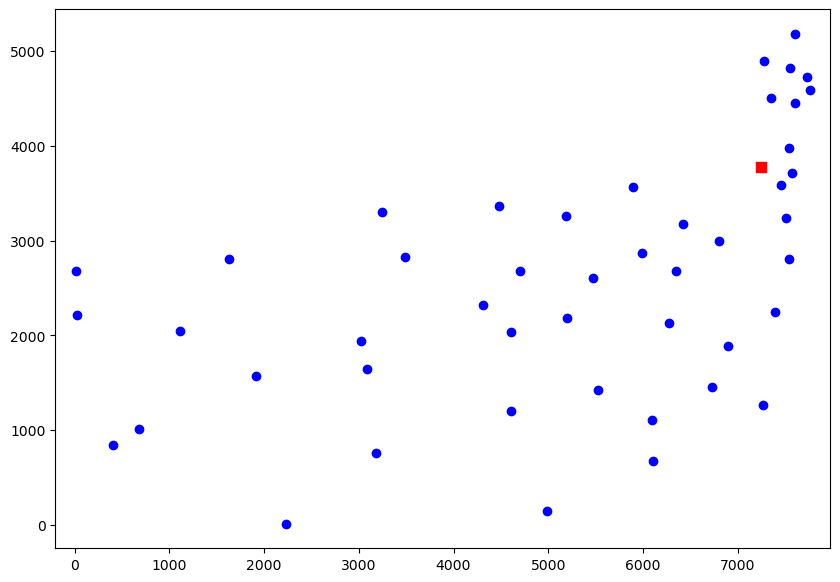

In [150]:
functions.scatterplotAllPoints(df, depo, avgPoint)

In [151]:
twoparts = functions.collectingTwoParts(df, avgPoint, depo)
part1 = twoparts[0]
part2 = twoparts[1]

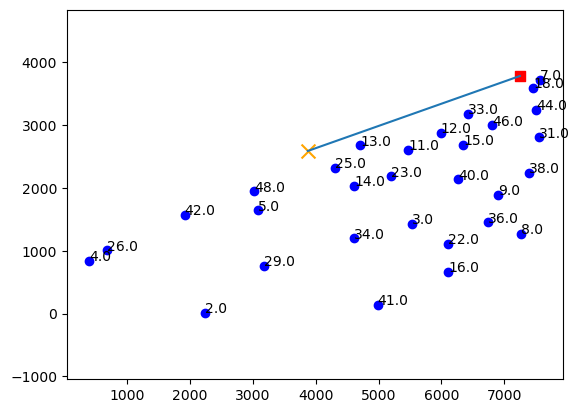

In [152]:
functions.plotLeftOrRightPoints(part1, avgPoint, depo)

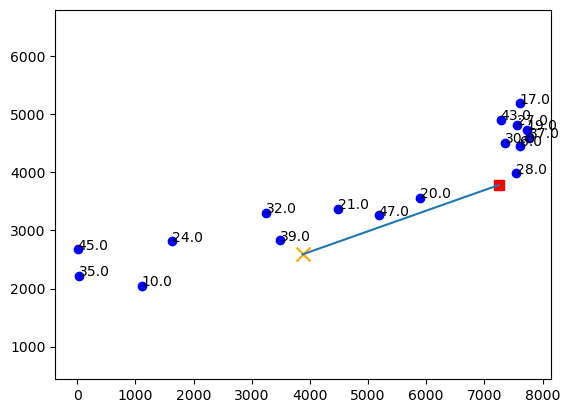

In [153]:
functions.plotLeftOrRightPoints(part2, avgPoint, depo)

In [154]:
part1['proj'] = part1['cosPhi'] * part1['b']
part2['proj'] = part2['cosPhi'] * part2['b']

In [155]:
part1['coef2'] = part1['proj'] * part1['cosPhi']
part2['coef2'] = part2['proj'] * part2['cosPhi']

In [156]:
for i in range(len(part1)):
    part1['angle'][i] = degrees(acos(part1['cosPhi'][i]))
for i in range(len(part2)):
    part2['angle'][i] = degrees(acos(part2['cosPhi'][i]))

In [157]:
bootResult1 = functions.dataframeForPointsWithBootAngles(part1, part2)
part1 = bootResult1[0]
boot1 = bootResult1[1]
boot1.index = range(len(boot1))


bootResult2 = functions.dataframeForPointsWithBootAngles(part2, part2)
part2 = bootResult2[0]
boot2 = bootResult2[1]
boot2.index = range(len(boot2))
boot = pd.concat([boot1, boot2], ignore_index=True)
boot

,id,belonging,Latitude,Longitude,proj,cosPhi,a,b,c,angle,coef2
0,7.0,part1,7573.0,3716.0,-285.420987,-0.862169,3576.485426,331.049845,3865.546533,149.561022,246.081190
1,18.0,part1,7462.0,3590.0,-138.773108,-0.486050,3576.485426,285.511821,3723.627935,119.081309,67.450712
2,6.0,part2,7608.0,4458.0,-565.719627,-0.736104,3576.485426,768.531717,4174.741309,137.400624,416.428742
3,17.0,part2,7611.0,5184.0,-810.515256,-0.558539,3576.485426,1451.135418,4549.135522,123.954798,452.704119
4,19.0,part2,7732.0,4723.0,-770.951275,-0.726733,3576.485426,1060.844946,4408.087113,136.613224,560.275911
5,27.0,part2,7555.0,4819.0,-636.066901,-0.586580,3576.485426,1084.365713,4303.122703,125.914666,373.103924
6,28.0,part2,7541.0,3981.0,-343.571930,-0.965406,3576.485426,355.883408,3921.155569,164.885323,331.686357
7,30.0,part2,7352.0,4506.0,-340.354246,-0.463445,3576.485426,734.401117,3970.533591,117.609607,157.735344
8,37.0,part2,7762.0,4595.0,-756.575151,-0.784510,3576.485426,964.392036,4374.135343,141.675378,593.540736
9,43.0,part2,7280.0,4899.0,-403.453063,-0.360079,3576.485426,1120.457050,4114.919197,111.105048,145.274979


___

# !!!

In [158]:
data1 = part1[['id', 'angle', 'coef2', 'b']]
data2 = part2[['id', 'angle', 'coef2', 'b']]

In [159]:
resultat1 = functions.ggg(data1, dist)[0]
# tek1 = functions.ggg(data1, dist)[1]
resultat2 = functions.ggg(data2, dist)[0]
# tek2 = functions.ggg(data2, dist)[1]
print(resultat1)
print(resultat2)

[31.0, 44.0, 38.0, 8.0, 9.0, 36.0, 16.0, 41.0, 22.0, 40.0, 46.0, 15.0, 3.0, 34.0, 23.0, 2.0, 29.0, 14.0, 11.0, 12.0, 33.0, 13, 48.0, 42.0, 26.0, 4.0, 5, 25.0]
[20.0, 21.0, 32.0, 24.0, 45.0, 35.0, 39.0, 47.0, 10.0]


____

____

In [160]:
if list(boot['belonging']).count('part1') == 1:
    resultat1.insert(0, boot['id'][list(boot['belonging']).index('part1')])
elif list(boot['belonging']).count('part1') > 1:
    boot_1 = boot[boot['belonging'] == 'part1']
    boot_1.index = range(len(boot_1))
    boot1res = functions.ggg(boot_1, dist)[0]
    print(boot1res)
    resultat1 = boot1res[::-1] + resultat1

if list(boot['belonging']).count('part2') == 1:
    resultat2.insert(0, boot['id'][list(boot['belonging']).index('part2')])                     
elif list(boot['belonging']).count('part2') > 1:
    boot_2 = boot[boot['belonging'] == 'part2']
    boot_2.index = range(len(boot_2))
    boot2res = functions.ggg(boot_2, dist)[0]
    print(boot2res)
    resultat2 = boot2res[::-1] + resultat2

[18.0, 7.0]
[43.0, 30.0, 6.0, 37.0, 19.0, 27.0, 17.0, 28]


In [161]:
print(resultat1)
print(resultat2)

[7.0, 18.0, 31.0, 44.0, 38.0, 8.0, 9.0, 36.0, 16.0, 41.0, 22.0, 40.0, 46.0, 15.0, 3.0, 34.0, 23.0, 2.0, 29.0, 14.0, 11.0, 12.0, 33.0, 13, 48.0, 42.0, 26.0, 4.0, 5, 25.0]
[28, 17.0, 27.0, 19.0, 37.0, 6.0, 30.0, 43.0, 20.0, 21.0, 32.0, 24.0, 45.0, 35.0, 39.0, 47.0, 10.0]


In [162]:
len(resultat1) + len(resultat2), len(df)

(47, 47)

In [163]:
totalList = [int(i) for i in resultat1 + resultat2[::-1]]
totalList.insert(0, 1)
totalList.insert(len(totalList), 1)
print(totalList)

[1, 7, 18, 31, 44, 38, 8, 9, 36, 16, 41, 22, 40, 46, 15, 3, 34, 23, 2, 29, 14, 11, 12, 33, 13, 48, 42, 26, 4, 5, 25, 10, 47, 39, 35, 45, 24, 32, 21, 20, 43, 30, 6, 37, 19, 27, 17, 28, 1]


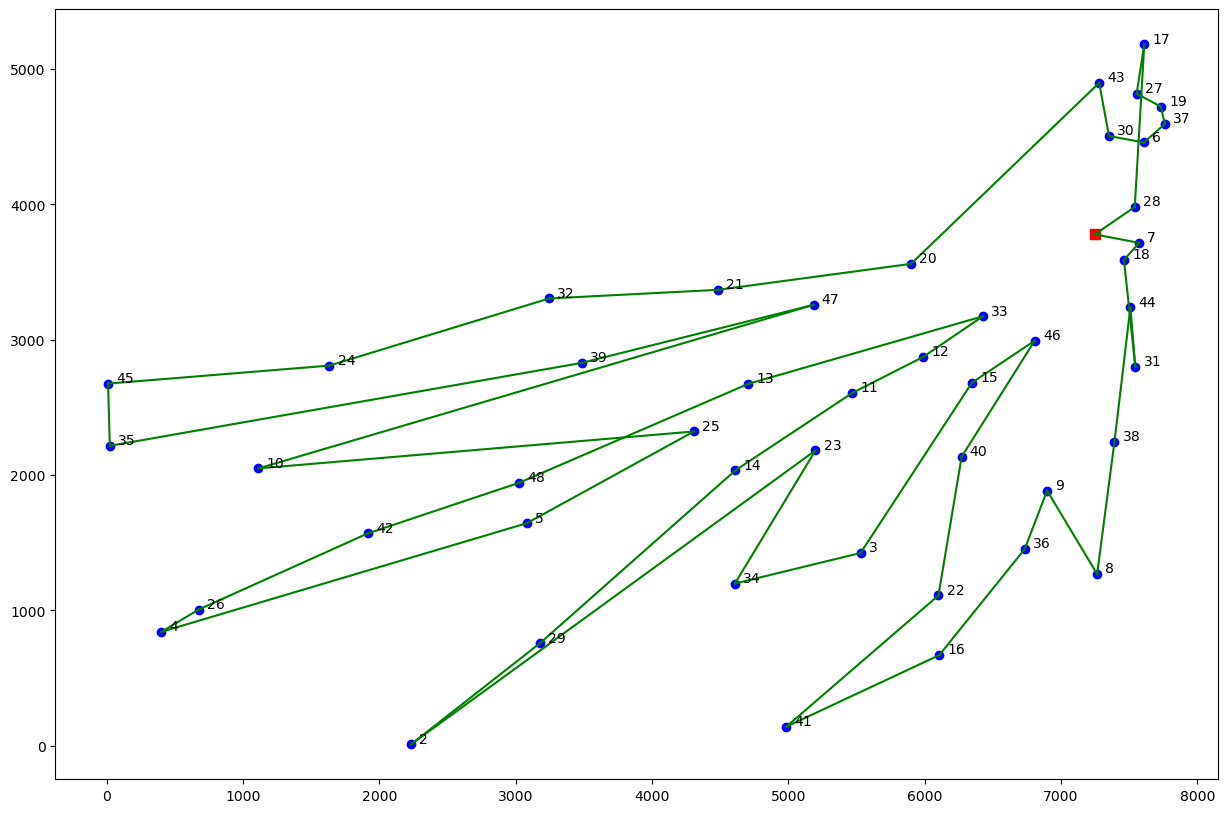

In [164]:
functions.getPlot(totalList, df, depo, avgPoint)

In [165]:
functions.calculateDistanceForGivenList(totalList, dist)

58666.58891236061

___

____

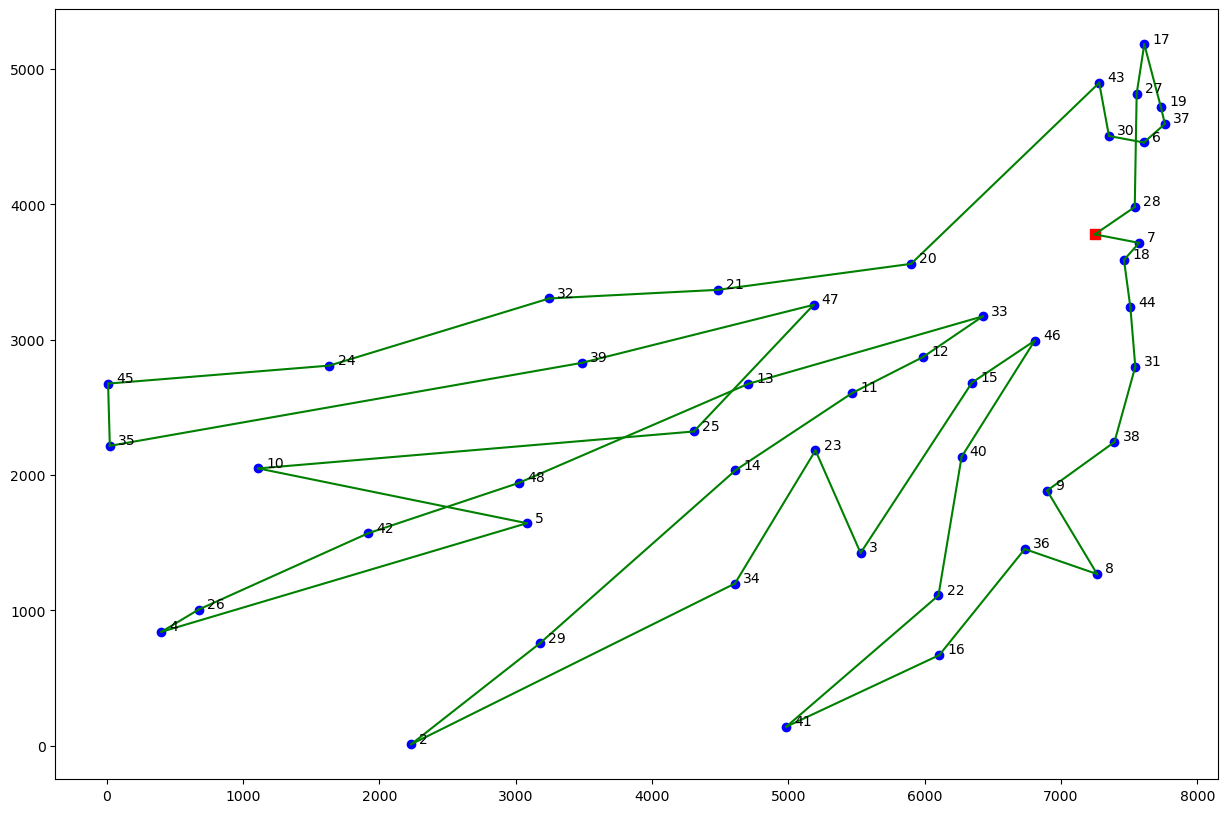

In [166]:
functions.getPlot(functions.swapTwoPoints(totalList, dist)[0], df, depo, avgPoint)

In [167]:
a = functions.swapTwoPoints(totalList, dist)[0]
functions.swapTwoPoints(totalList, dist)[1]

53941.0737341904

In [168]:
a.remove(a[0])
a.remove(a[len(a)-1])

In [169]:
res = functions.distFromDepot(a, dist)

In [170]:
# res

In [171]:
key_list = list(res.keys())
val_list = list(res.values())

In [172]:
resultatRemained = functions.removingOutliers(val_list)[0]
resultatRemoved = functions.removingOutliers(val_list)[1]
len(a), len(resultatRemained) + len(resultatRemoved)

(47, 47)

In [173]:
remained = []
removed = []
for i in resultatRemained:
    remained.append(key_list[val_list.index(i)])
for i in resultatRemoved:
    removed.append(key_list[val_list.index(i)])

In [174]:
len(remained) + len(removed)

47

In [175]:
b = remained[:]
b.insert(0, 1)
b.insert(len(b), 1)
print(b)

[1, 7, 44, 31, 38, 9, 8, 16, 41, 2, 29, 42, 26, 4, 10, 35, 45, 24, 32, 21, 20, 43, 37, 19, 17, 27, 28, 1]


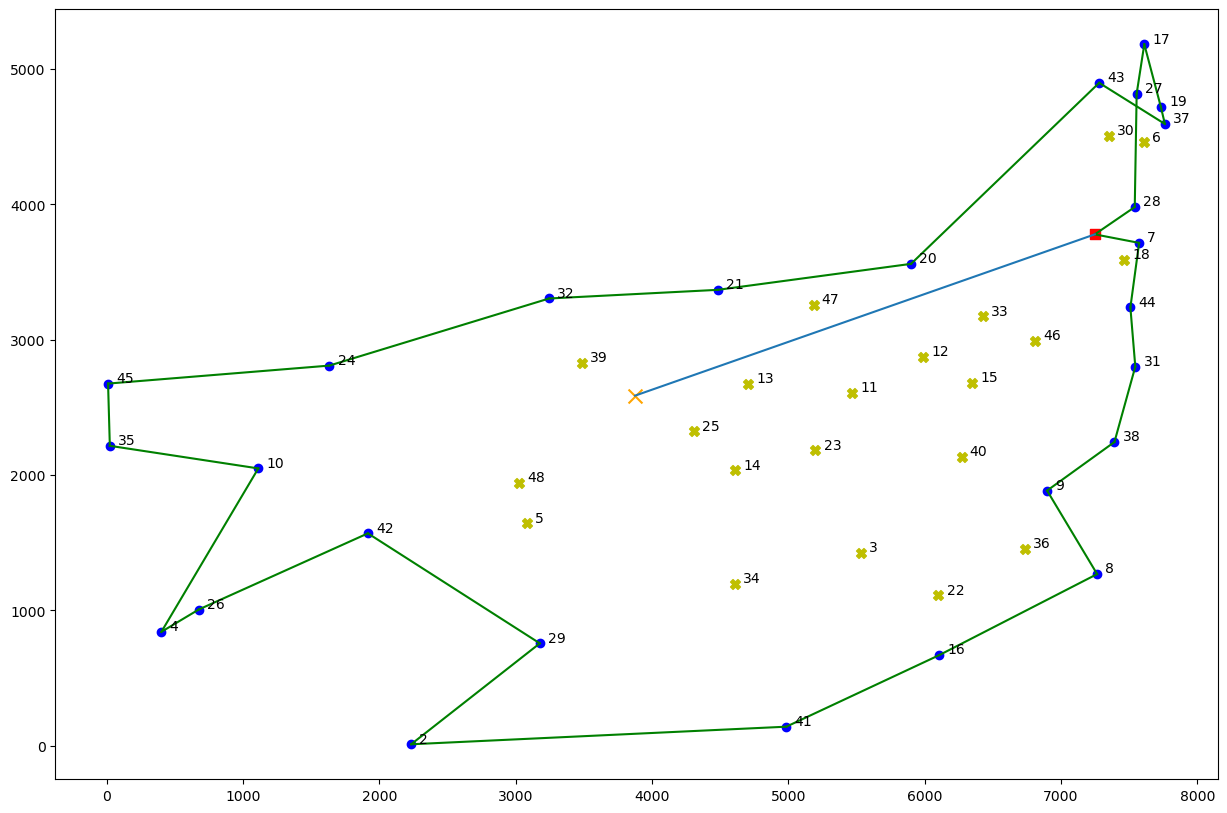

In [176]:
functions.getPlotWithRemovedPoints(b, df, depo, avgPoint, removed)

In [177]:
print(remained)
print(removed)

[7, 44, 31, 38, 9, 8, 16, 41, 2, 29, 42, 26, 4, 10, 35, 45, 24, 32, 21, 20, 43, 37, 19, 17, 27, 28]
[18, 36, 46, 15, 40, 22, 23, 3, 34, 33, 12, 11, 13, 14, 48, 5, 47, 25, 39, 30, 6]


In [178]:
added = functions.addingRemovedPointsToRoute(removed, remained, dist)
added.insert(0, 1)
added.insert(len(added), 1)
print(added)
print('*'*124)
print(len(added))
print('*'*124)
addedDist = functions.calculateDistanceForGivenList(added, dist)
print(addedDist)

[1, 7, 18, 44, 46, 33, 15, 12, 11, 23, 25, 14, 3, 40, 31, 38, 9, 8, 36, 22, 16, 41, 34, 2, 29, 5, 48, 42, 26, 4, 10, 35, 45, 24, 32, 39, 21, 47, 13, 20, 43, 37, 19, 17, 27, 30, 6, 28, 1]
****************************************************************************************************************************
49
****************************************************************************************************************************
38636.729409416585


In [179]:
# def addingReverselyRemovedPointsToRoute(removedList, remainedList, dist):
#     import functions
#     remained_ = remainedList[:]
#     for i in removedList[::-1]:
#         u = {}
#         b = remained_[:]
#         d = remained_[:]
#         for j in remained_:
#             u[j] = dist[i - 1][j - 1]
            
#         close = list(dict(sorted(u.items(), key = lambda x: x[1])).keys())[0]
#         findIndexOfClose = remained_.index(close)
        
#         b.insert(findIndexOfClose, i)
#         firstVariantDist = functions.calculateDistanceForGivenList(b, dist)
        
#         d.insert(findIndexOfClose + 1, i)
#         secondVariantDist = functions.calculateDistanceForGivenList(d, dist)
        
#         if firstVariantDist < secondVariantDist:
#             remained_.insert(findIndexOfClose, i)
#         else:
#             remained_.insert(findIndexOfClose + 1, i)
#     return remained_

In [180]:
addedReverse = functions.addingReverselyRemovedPointsToRoute(removed, remained, dist)
addedReverse.insert(0, 1)
addedReverse.insert(len(addedReverse), 1)
print(addedReverse)
print('*'*124)
print(len(addedReverse))
print('*'*124)
addedReverseDist = functions.calculateDistanceForGivenList(addedReverse, dist)
print(addedReverseDist)

[1, 7, 18, 44, 31, 38, 9, 8, 36, 16, 22, 3, 41, 34, 2, 29, 5, 48, 42, 26, 4, 10, 35, 45, 24, 32, 39, 25, 14, 23, 13, 21, 47, 11, 40, 15, 12, 46, 33, 20, 43, 6, 37, 19, 17, 27, 30, 28, 1]
****************************************************************************************************************************
49
****************************************************************************************************************************
36665.131935545454


In [181]:
if addedDist <= addedReverseDist:
    currentResult = added
else:
    currentResult = addedReverse
    
print(currentResult)
functions.calculateDistanceForGivenList(currentResult, dist)

[1, 7, 18, 44, 31, 38, 9, 8, 36, 16, 22, 3, 41, 34, 2, 29, 5, 48, 42, 26, 4, 10, 35, 45, 24, 32, 39, 25, 14, 23, 13, 21, 47, 11, 40, 15, 12, 46, 33, 20, 43, 6, 37, 19, 17, 27, 30, 28, 1]


36665.131935545454

In [182]:
# functions.getPlot(currentResult, df, depo, avgPoint)

In [183]:
currentswapped = functions.swapTwoPoints(currentResult, dist)[0]
functions.swapTwoPoints(currentResult, dist)[1]

36283.81421985636

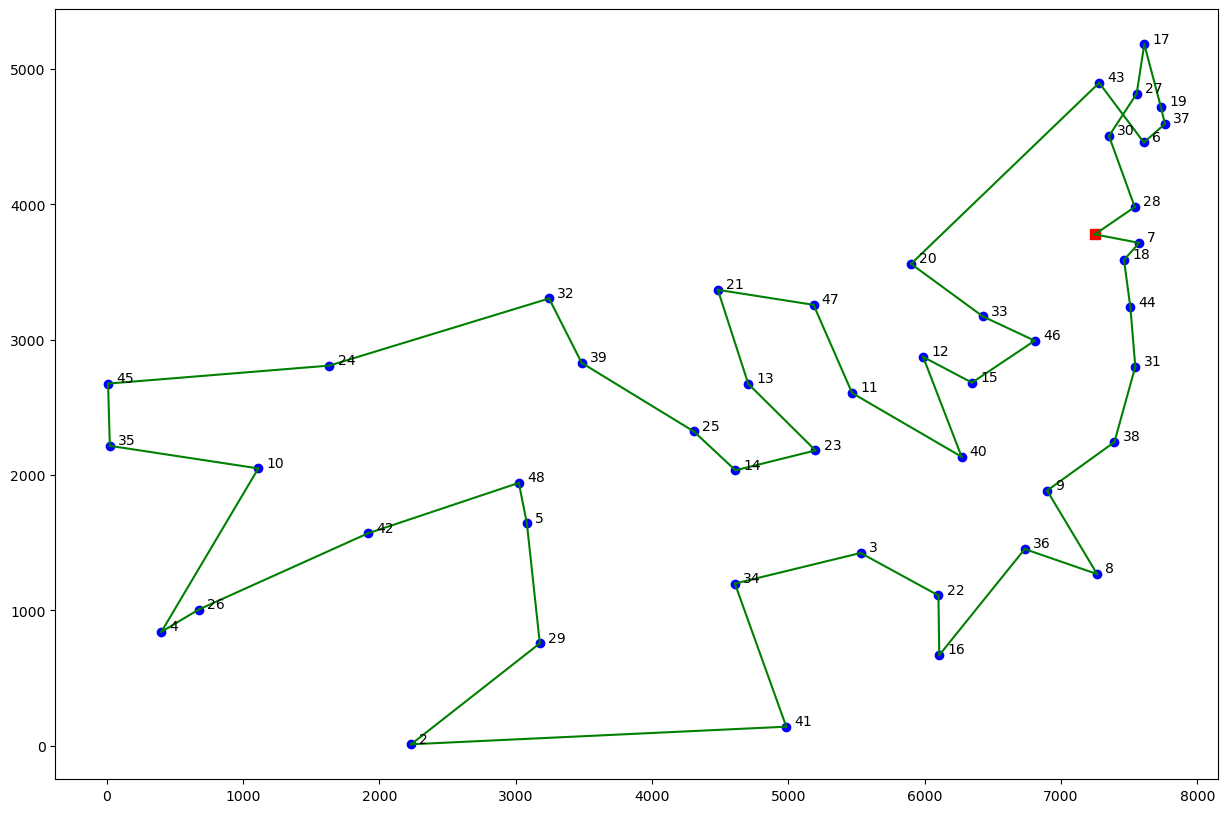

In [184]:
functions.getPlot(currentswapped, df, depo, avgPoint)

### hope for 15.02.22

In [185]:
swappedWhole = functions.swapping(currentswapped, dist)
functions.calculateDistanceForGivenList(swappedWhole, dist)

36051.294735882024

In [186]:
# functions.getPlot(swapping(currentswapped), df, depo, avgPoint)

In [187]:
swappedWholeSwapTwo = functions.swapTwoPoints(swappedWhole, dist)
swappedWholeSwapTwo[1]

35569.7076425584

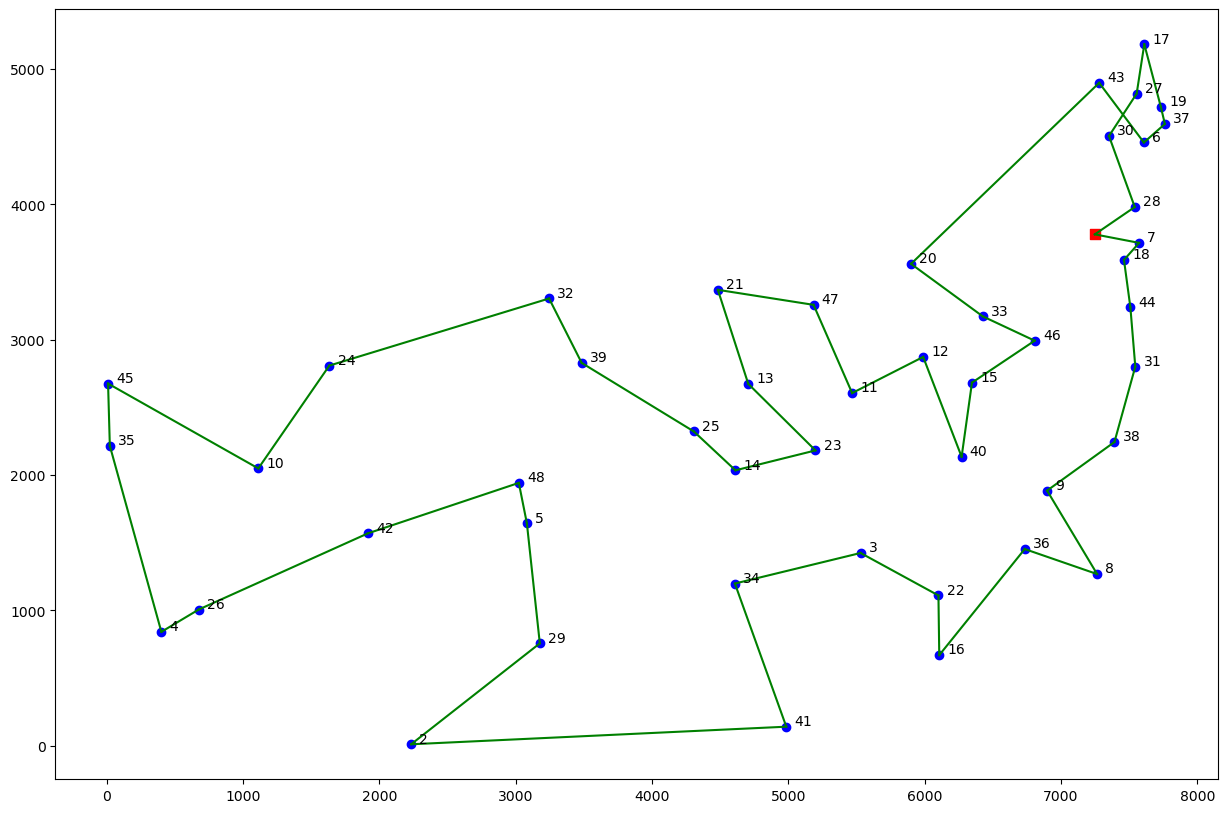

In [188]:
functions.getPlot(swappedWholeSwapTwo[0], df, depo, avgPoint)

In [189]:
def randomSwap(listname, dist):
    import functions
#     h=0
    best = listname[:]
    distBest = functions.calculateDistanceForGivenList(best, dist)
#     distCurrent = calculateDistanceForGivenList(best)
    for i in range(100000):
        rand1 = randint(1, len(listname) - 2)
        rand2 = randint(1, len(listname) - 2)
        if rand1 != rand2:
            current = best[:]
            current[rand1], current[rand2] = current[rand2], current[rand1]
            distCurrent = functions.calculateDistanceForGivenList(current, dist)
            if distCurrent <= distBest: #) or (h<1000 and (distCurrent-distBest)/distBest * 100 < 2)):
#                 h += 1
                best = current
                distBest = distCurrent
            else:
                continue
    return best

In [190]:
end = randomSwap(swappedWholeSwapTwo[0], dist)

In [191]:
functions.calculateDistanceForGivenList(end, dist)

35351.840229772

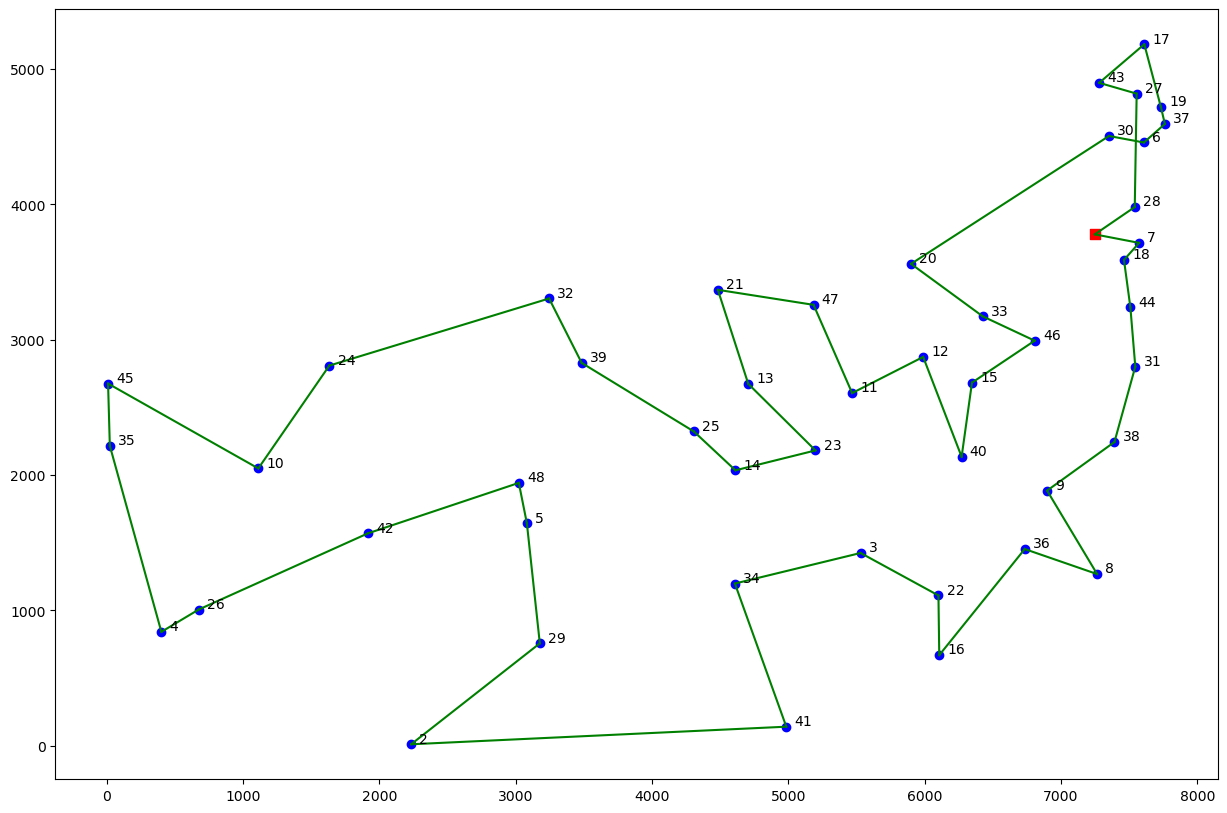

In [192]:
functions.getPlot(end, df, depo, avgPoint)